2025/9/28 Ariel Consortium meeting (Madrid)に向けて 
ターゲットリストの中にどれだけActiveな星が含まれているか

In [1]:
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

In [73]:
df_MCS = pd.read_csv('data/Ariel_MCS_Known_2025-08-18.csv')
df_MCS

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
0,55Cnc,0.905,-0.015,0.015,5234.0,-30.0,30.0,0.943,-0.010,0.010,...,9.0,14.0,Transit,3.0,7.0,12.0,0,0,0,2
1,AUMic,0.510,-0.027,0.028,3678.0,-88.0,90.0,0.744,-0.021,0.023,...,59.0,101.0,Transit,1.0,1.0,2.0,0,0,0,3
2,CoRoT-11,1.270,-0.050,0.050,6440.0,-120.0,120.0,1.370,-0.030,0.030,...,11.0,21.0,Eclipse,2.0,11.0,21.0,1,0,1,2
3,CoRoT-19,1.210,-0.050,0.050,6090.0,-70.0,70.0,1.650,-0.040,0.040,...,20.0,39.0,Eclipse,3.0,20.0,39.0,1,0,1,2
4,CoRoT-2,0.960,-0.080,0.080,5625.0,-120.0,120.0,0.906,-0.027,0.026,...,1.0,1.0,Eclipse,1.0,1.0,1.0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,XO-4,1.100,-0.220,0.220,6397.0,-70.0,70.0,1.450,-0.090,0.090,...,2.0,4.0,Eclipse,1.0,2.0,4.0,0,0,0,2
810,XO-5,1.040,-0.030,0.030,5430.0,-70.0,70.0,1.130,-0.030,0.030,...,7.0,15.0,Eclipse,1.0,7.0,15.0,0,0,0,2
811,XO-6,1.470,-0.060,0.060,6720.0,-100.0,100.0,1.930,-0.180,0.180,...,1.0,1.0,Eclipse,1.0,1.0,1.0,0,0,0,3
812,XO-7,1.405,-0.059,0.059,6250.0,-100.0,100.0,1.480,-0.022,0.022,...,1.0,2.0,Eclipse,1.0,1.0,2.0,0,0,0,3


In [74]:
df_MCS.columns

Index(['Star Name', 'Star Mass [Ms]', 'Star Mass Error Lower [Ms]',
       'Star Mass Error Upper [Ms]', 'Star Temperature [K]',
       'Star Temperature Error Lower [K]', 'Star Temperature Error Upper [K]',
       'Star Radius [Rs]', 'Star Radius Error Lower [Rs]',
       'Star Radius Error Upper [Rs]',
       ...
       'Tier 2 Eclipses', 'Tier 3 Eclipses', 'Preferred Method',
       'Tier 1 Observations', 'Tier 2 Observations', 'Tier 3 Observations',
       'FGS1_Flag', 'FGS2_Flag', 'FGS_Flag', 'Max Tier'],
      dtype='object', length=193)

In [75]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
pl.rcParams['ytick.labelsize'] = 'medium'
pl.rcParams['xtick.labelsize'] =  'medium'

Text(0, 0.5, 'Stellar Age (Gyr)')

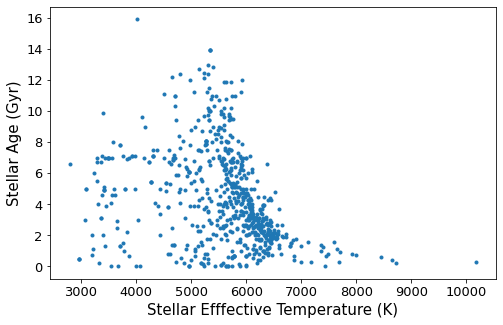

In [76]:
f = pl.figure(figsize=(8, 5))
pl.plot(df_MCS['Star Temperature [K]'], df_MCS['Star Age [Gyr]'], '.')

pl.xlabel('Stellar Efffective Temperature (K)', fontsize=15)
pl.ylabel('Stellar Age (Gyr)', fontsize=15)


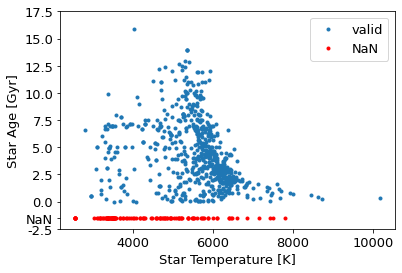

In [77]:
x = df_MCS['Star Temperature [K]']
y = df_MCS['Star Age [Gyr]']

# 通常データ (NaNを除く)
mask_valid = ~y.isna()
pl.plot(x[mask_valid], y[mask_valid], '.', label='valid')

# NaNデータ
mask_nan = y.isna()
# y 軸の最小値より少し下に配置
ymin = np.nanmin(y)
y_nan = np.full(mask_nan.sum(), ymin - 1.5)  # -0.5 は適当なオフセット

pl.plot(x[mask_nan], y_nan, '.', color='red', label='NaN')  # 'x'はマーカー種類

# 軸ラベル
pl.xlabel("Star Temperature [K]")
pl.ylabel("Star Age [Gyr]")

# y 軸に "NaN" という目盛りを追加
ticks = pl.yticks()[0]
pl.yticks(list(ticks) + [ymin - 1.5], list(map(str, ticks)) + ['NaN'])

pl.legend()

In [106]:
df_MCS[df_MCS['Star Name']=='TOI-3884']['Star Age [Gyr]']

KeyError: "None of [Index(['55Cnc', 'AUMic', 'CoRoT-11', 'CoRoT-19', 'CoRoT-2', 'CoRoT-36',\n       'DSTucA', 'EPIC211945201', 'EPIC246851721', 'G9-40',\n       ...\n       'Wolf327', 'Wolf503', 'XO-1', 'XO-2N', 'XO-3', 'XO-4', 'XO-5', 'XO-6',\n       'XO-7', 'HD39091'],\n      dtype='object', length=814)] are in the [columns]"

In [94]:
df_MCS[df_MCS['Star Name']=='LP791-18']['Star Age [Gyr]']

299    0.5
300    0.5
301    0.5
Name: Star Age [Gyr], dtype: float64

In [79]:
df_Ms = df_MCS[df_MCS['Star Temperature [K]']<4000]
df_Ms['Star Age [Gyr]']

1      0.0201
9      9.9000
10        NaN
11        NaN
12     3.9000
        ...  
637       NaN
638       NaN
639       NaN
640       NaN
804    4.1000
Name: Star Age [Gyr], Length: 119, dtype: float64

In [107]:
df_MCS['Planet Semi-major Axis [au]']

0      0.015440
1      0.064900
2      0.043600
3      0.051800
4      0.027980
         ...   
809    0.051788
810    0.051500
811    0.081500
812    0.044210
813    0.068390
Name: Planet Semi-major Axis [au], Length: 814, dtype: float64

In [80]:
df_young = df_MCS[df_MCS['Star Age [Gyr]']<1]
df_young

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
1,AUMic,0.510,-0.027,0.028,3678.0,-88.0,90.0,0.744,-0.021,0.023,...,59.0,101.0,Transit,1.0,1.0,2.0,0,0,0,3
6,DSTucA,1.010,-0.060,0.060,5428.0,-80.0,80.0,0.964,-0.029,0.029,...,25.0,44.0,Transit,1.0,3.0,6.0,0,0,0,2
26,GPX-1,1.680,-0.100,0.100,7000.0,-200.0,200.0,1.560,-0.100,0.100,...,5.0,10.0,Eclipse,1.0,5.0,10.0,0,0,0,2
91,HAT-P-70,1.890,-0.013,0.010,8450.0,-690.0,540.0,1.858,-0.091,0.119,...,1.0,1.0,Eclipse,1.0,1.0,1.0,0,0,0,3
100,HATS-24,1.218,-0.036,0.036,6346.0,-81.0,81.0,1.194,-0.041,0.066,...,2.0,3.0,Eclipse,1.0,2.0,3.0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,WASP-194,1.290,-0.080,0.080,6405.0,-200.0,200.0,1.409,-0.090,0.090,...,6.0,12.0,Eclipse,1.0,6.0,12.0,0,0,0,2
727,WASP-195,1.300,-0.080,0.080,6300.0,-125.0,125.0,1.578,-0.066,0.066,...,33.0,65.0,Transit,1.0,6.0,11.0,0,0,0,2
735,WASP-25,0.670,-0.220,0.220,5750.0,-100.0,100.0,0.800,-0.080,0.080,...,4.0,7.0,Eclipse,1.0,4.0,7.0,0,0,0,2
758,WASP-52,0.870,-0.030,0.030,5000.0,-100.0,100.0,0.790,-0.020,0.020,...,2.0,2.0,Eclipse,1.0,2.0,2.0,0,0,0,3


In [81]:
len(df_Ms)

119

In [83]:
len(df_young)

83

In [84]:
df_targ = df_MCS[(df_MCS['Star Age [Gyr]']<1) & (df_MCS['Star Temperature [K]']<4000)]
df_targ

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
1,AUMic,0.5100,-0.0270,0.0280,3678.0,-88.0,90.0,0.7440,-0.0210,0.0230,...,59.0,101.0,Transit,1.0,1.0,2.0,0,0,0,3
208,K2-25,0.2634,-0.0077,0.0077,3207.0,-58.0,58.0,0.2932,-0.0093,0.0093,...,NaN,NaN,Transit,5.0,63.0,125.0,1,0,1,1
223,K2-33,0.5600,-0.0900,0.0900,3540.0,-70.0,70.0,1.0500,-0.0700,0.0700,...,340.0,644.0,Transit,7.0,79.0,156.0,1,0,1,1
299,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1710,-0.0180,0.0180,...,3113.0,6644.0,Transit,4.0,48.0,96.0,1,0,1,1
300,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1820,-0.0070,0.0070,...,38460.0,93965.0,Transit,1.0,14.0,27.0,1,0,1,2
301,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1820,-0.0070,0.0070,...,161441.0,286282.0,Transit,3.0,33.0,66.0,1,0,1,1
329,TIC88785435,0.7240,-0.0170,0.0170,3998.0,-95.0,95.0,0.9110,-0.0380,0.0380,...,890.0,1757.0,Transit,5.0,50.0,101.0,0,0,0,1
347,TOI-1224,0.4000,-0.0100,0.0100,3326.0,-66.0,66.0,0.4040,-0.0120,0.0120,...,4853.0,8358.0,Transit,7.0,80.0,158.0,1,0,1,1
410,TOI-1801,0.5560,-0.0350,0.0420,3863.0,-77.0,77.0,0.5470,-0.0230,0.0250,...,11357.0,25292.0,Transit,5.0,34.0,66.0,0,0,0,1


In [85]:
import lightkurve as lk

In [86]:
search_result = lk.search_lightcurve('TIC88785435', )
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 11,2019,TESS-SPOC,1800,88785435,0.0
1,TESS Sector 11,2019,QLP,1800,88785435,0.0
2,TESS Sector 11,2019,GSFC-ELEANOR-LITE,1800,88785435,0.0
3,TESS Sector 11,2019,TGLC,1800,88785435,0.0
4,TESS Sector 38,2021,TESS-SPOC,600,88785435,0.0
5,TESS Sector 38,2021,QLP,600,88785435,0.0
6,TESS Sector 38,2021,CDIPS,1800,88785435,0.0
7,TESS Sector 65,2023,TESS-SPOC,200,88785435,0.0
8,TESS Sector 65,2023,QLP,200,88785435,0.0


In [87]:
target_names = list(set(df_targ['Star Name']))
target_names

['K2-25', 'K2-33', 'TIC88785435', 'AUMic', 'TOI-1224', 'TOI-1801', 'LP791-18']

(0.93, 1.07)

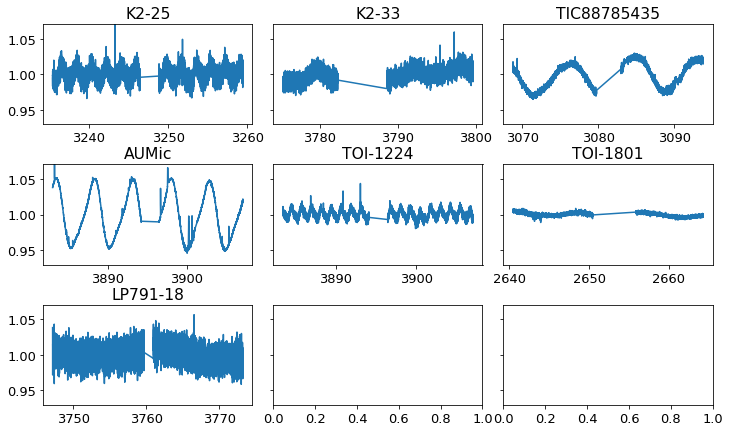

In [105]:
f, axs = pl.subplots(int(np.ceil(len(target_names)/3)), 3, figsize=(12, 7), sharey=True)
pl.subplots_adjust(hspace=0.4, wspace=0.1)

for i, name in enumerate(target_names):

    if i == 2:
        search_result = lk.search_lightcurve(name)
        lc = search_result[7].download()
        
    
    else:
        search_result = lk.search_lightcurve(name, mission='TESS', author='SPOC', exptime=120)
        lc = search_result[-1].download()
    
    lc = lc.remove_nans()


    time = lc.time.btjd
    sap =  lc.sap_flux.value
    sap_norm = sap/np.median(sap)

    sap_err = lc.sap_flux_err.value/np.median(sap)


    axs[np.int(i/3)][i%3].plot(time, sap_norm)
    axs[np.int(i/3)][i%3].set_title(name)
    
axs[0][0].set_ylim(0.93, 1.07)
    #pl.plot(time, pdcsap_norm)

## Exoclock targetsの場合は？

In [111]:
import urllib
import json

exoclock_planets = json.loads(urllib.request.urlopen('https://www.exoclock.space/database/planets_json').read())

In [112]:
len(exoclock_planets)

776

In [136]:
exoclock_keys = set(exoclock_planets.keys())
#target_names = set(list((df_Ms['Planet Name']))+list((df_young['Planet Name'])))

df_targ = df_MCS[(df_MCS['Star Age [Gyr]']<1) & (df_MCS['Star Temperature [K]']<4500)]
target_names = set(list((df_targ['Planet Name']))
                   
common_targets = exoclock_keys & target_names

print(common_targets)

SyntaxError: invalid syntax (<ipython-input-136-de0c3b458d19>, line 7)

In [138]:
df_targ = df_MCS[(df_MCS['Star Age [Gyr]']<1) & (df_MCS['Star Temperature [K]']<4500)]
df_targ

,Star Name,Star Mass [Ms],Star Mass Error Lower [Ms],Star Mass Error Upper [Ms],Star Temperature [K],Star Temperature Error Lower [K],Star Temperature Error Upper [K],Star Radius [Rs],Star Radius Error Lower [Rs],Star Radius Error Upper [Rs],...,Tier 2 Eclipses,Tier 3 Eclipses,Preferred Method,Tier 1 Observations,Tier 2 Observations,Tier 3 Observations,FGS1_Flag,FGS2_Flag,FGS_Flag,Max Tier
1,AUMic,0.5100,-0.0270,0.0280,3678.0,-88.0,90.0,0.7440,-0.0210,0.0230,...,59.0,101.0,Transit,1.0,1.0,2.0,0,0,0,3
189,IRAS04125+2902,0.7000,-0.0400,0.0400,4080.0,-95.0,95.0,1.4500,-0.1000,0.1000,...,19.0,35.0,Eclipse,4.0,19.0,35.0,0,0,0,2
208,K2-25,0.2634,-0.0077,0.0077,3207.0,-58.0,58.0,0.2932,-0.0093,0.0093,...,NaN,NaN,Transit,5.0,63.0,125.0,1,0,1,1
223,K2-33,0.5600,-0.0900,0.0900,3540.0,-70.0,70.0,1.0500,-0.0700,0.0700,...,340.0,644.0,Transit,7.0,79.0,156.0,1,0,1,1
299,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1710,-0.0180,0.0180,...,3113.0,6644.0,Transit,4.0,48.0,96.0,1,0,1,1
300,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1820,-0.0070,0.0070,...,38460.0,93965.0,Transit,1.0,14.0,27.0,1,0,1,2
301,LP791-18,0.1390,-0.0050,0.0050,2960.0,-55.0,55.0,0.1820,-0.0070,0.0070,...,161441.0,286282.0,Transit,3.0,33.0,66.0,1,0,1,1
329,TIC88785435,0.7240,-0.0170,0.0170,3998.0,-95.0,95.0,0.9110,-0.0380,0.0380,...,890.0,1757.0,Transit,5.0,50.0,101.0,0,0,0,1
347,TOI-1224,0.4000,-0.0100,0.0100,3326.0,-66.0,66.0,0.4040,-0.0120,0.0120,...,4853.0,8358.0,Transit,7.0,80.0,158.0,1,0,1,1
410,TOI-1801,0.5560,-0.0350,0.0420,3863.0,-77.0,77.0,0.5470,-0.0230,0.0250,...,11357.0,25292.0,Transit,5.0,34.0,66.0,0,0,0,1


In [126]:
systems = {name[:-1] for name in common_targets}

print(systems)

{'V1298Tau', 'GJ3929', 'TOI-244', 'WASP-178', 'TOI-1759', 'TOI-122', 'LTT3780', 'HD260655', 'TOI-3629', 'GJ1252', 'Kepler-138', 'L98-59', 'TOI-1442', 'K2-33', 'HIP67522', 'TOI-540', 'LHS3844', 'Qatar-4', 'TOI-1201', 'TOI-251', 'HD207496', 'GJ486', 'TOI-451', 'HD235088', 'TOI-1468', 'WASP-62', 'TOI-3884', 'HAT-P-70', 'K2-415', 'TOI-1268', 'TOI-2136', 'TOI-269', 'HD110082', 'GJ3470', 'HD109833', 'TOI-942', 'K2-25', 'HIP94235', 'LP714-47', 'KELT-20', 'HD73583', 'HATS-55', 'TOI-2152A', 'TOI-270', 'TOI-1452', 'WASP-14', 'HATS-70', 'TOI-4479', 'TOI-1231', 'K2-260', 'GJ1132', 'TOI-833', 'TOI-532', 'TOI-444', 'TOI-3235', 'WASP-135', 'WASP-25', 'K2-18', 'TOI-672', 'TRAPPIST-1', 'G9-40', 'TOI-776', 'TOI-1807', 'GJ3473', 'LHS1478', 'KELT-17', 'GJ3090', 'TOI-3714', 'DSTucA', 'TOI-4087', 'TOI-1685', 'TOI-2445', 'TOI-2046', 'GJ357', 'GJ1214', 'TOI-712', 'MASCARA-1', 'Kepler-63', 'TOI-2076', 'TOI-700', 'HATS-24', 'LTT1445A', 'TOI-622', 'TOI-837', 'TOI-1136', 'Qatar-5', 'WASP-52', 'LP791-18', 'WASP-10

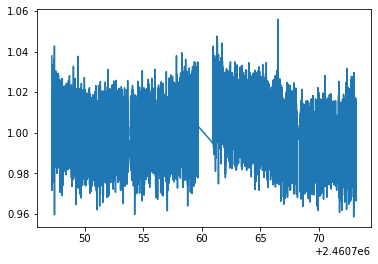

In [16]:
lc = search_result[6].download()
lc = lc.remove_nans()


time = lc.time.value + 2457000.0
sap =  lc.sap_flux.value
pdcsap = lc.pdcsap_flux.value

sap_norm = sap/np.median(sap)
pdcsap_norm = pdcsap/np.median(pdcsap)

sap_err = lc.sap_flux_err.value/np.median(sap)
pdcsap_err = lc.pdcsap_flux_err.value/np.median(pdcsap)

pl.plot(time, sap_norm)
#pl.plot(time, pdcsap_norm)

In [ ]:
lc = search_result[6].download()
lc = lc.remove_nans()


time = lc.time.value + 2457000.0
sap =  lc.sap_flux.value
pdcsap = lc.pdcsap_flux.value

sap_norm = sap/np.median(sap)
pdcsap_norm = pdcsap/np.median(pdcsap)

sap_err = lc.sap_flux_err.value/np.median(sap)
pdcsap_err = lc.pdcsap_flux_err.value/np.median(pdcsap)

pl.plot(time, sap_norm)
#pl.plot(time, pdcsap_norm)

In [8]:
df_young = pd.read_csv('data/young_validated_planets_TOIs.tsv',sep='\t')
df_young

,Host,TOI,URL,Cluster/,Age,Age_median,Age-dating method,exofop url,Discovery Ref.,Nplanets,...,sectors,Kepler/K2 era?,Prot,LiEW,logR'_HK,B-V,Is Tmag<13?,Is in South?,Is <100 pc?,South & <100pc?
0,https://docs.google.com/spreadsheets/d/1rnYjxN...,See also https://vizier.cds.unistra.fr/viz-bin...,NaN,Assoc.,[Myr],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,d,mA,NaN,mag,NaN,NaN,NaN,NaN
1,IRAS04125+2902,TOI-6963,https://exoplanetarchive.ipac.caltech.edu/over...,B209N in Taurus–Auriga SFR,1-15,8,disk,https://exofop.ipac.caltech.edu/tess/target.ph...,Barber+2024,1.0,...,Loading...,0,NaN,NaN,NaN,NaN,Loading...,Loading...,Loading...,Loading...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Luhman+2025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,K2-33,NaN,https://exoplanetarchive.ipac.caltech.edu/over...,USco M.G.,5-10,7.5,cluster,https://exofop.ipac.caltech.edu/tess/target.ph...,David+2016,1.0,...,Loading...,1,NaN,NaN,NaN,NaN,Loading...,Loading...,Loading...,Loading...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mann+2016,NaN,...,Loading...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,TIC 238395674,NaN,https://exoplanetarchive.ipac.caltech.edu/over...,NaN,NaN,NaN,NaN,https://exofop.ipac.caltech.edu/tess/target.ph...,Vach+2024a,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,TIC 150070085.01,NaN,https://exoplanetarchive.ipac.caltech.edu/over...,NaN,NaN,NaN,NaN,https://exofop.ipac.caltech.edu/tess/target.ph...,Vach+2024a,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,TIC 36332984,NaN,https://exoplanetarchive.ipac.caltech.edu/over...,NaN,NaN,NaN,NaN,https://exofop.ipac.caltech.edu/tess/target.ph...,Vach+2024a,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,TIC 89071445,NaN,https://exoplanetarchive.ipac.caltech.edu/over...,phi Lup; proposed with LCO-1m,9-18,NaN,cluster,https://exofop.ipac.caltech.edu/tess/target.ph...,Vach+2025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
